In [1]:
import os, glob
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# modify path so we can import a custom module
import sys
sys.path.append('.')

from segmentation import SpotTable, run_baysor

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
data_path = '../../../data/stereoseq/'
data_file = data_path + 'mouse-lasso.gem'
cache_file = data_file + '.npz'

if not os.path.exists(cache_file):
    print(f"Loading {data_file}..")

    dtype = [('gene', 'S20'), ('x', 'uint16'), ('y', 'uint16'), ('MIDcounts', int)]
    raw_data = np.loadtxt(data_file, skiprows=1, usecols=[0, 1, 2, 3], delimiter='\t', dtype=dtype)

    # convert genes to int ID
    genes = np.unique(raw_data['gene'])
    gene_map = {gene:i for i, gene in enumerate(genes)}
    data = np.empty(len(raw_data), dtype=[('gene', int), ('x', 'float32'), ('y', 'float32'), ('count', 'uint8')])
    data['x'] = raw_data['x']
    data['y'] = raw_data['y']
    data['count'] = raw_data['MIDcounts']
    data['gene'] = [gene_map[g] for g in raw_data['gene']]    
    
    print("Recompressing to npz..")
    np.savez_compressed(cache_file, data=data, genes=genes)
else:
    print("Loading from cache..")
    items = np.load(cache_file)
    data = items['data']
    genes = items['genes']


Loading from cache..


In [4]:
gene_map = {g:i for i, g in enumerate(genes)}

In [5]:
data.shape

(66963090,)

In [7]:
table = SpotTable(data)

In [8]:
sub = table.get_subregion(xlim=(13000, 15000), ylim=(15000, 17000))

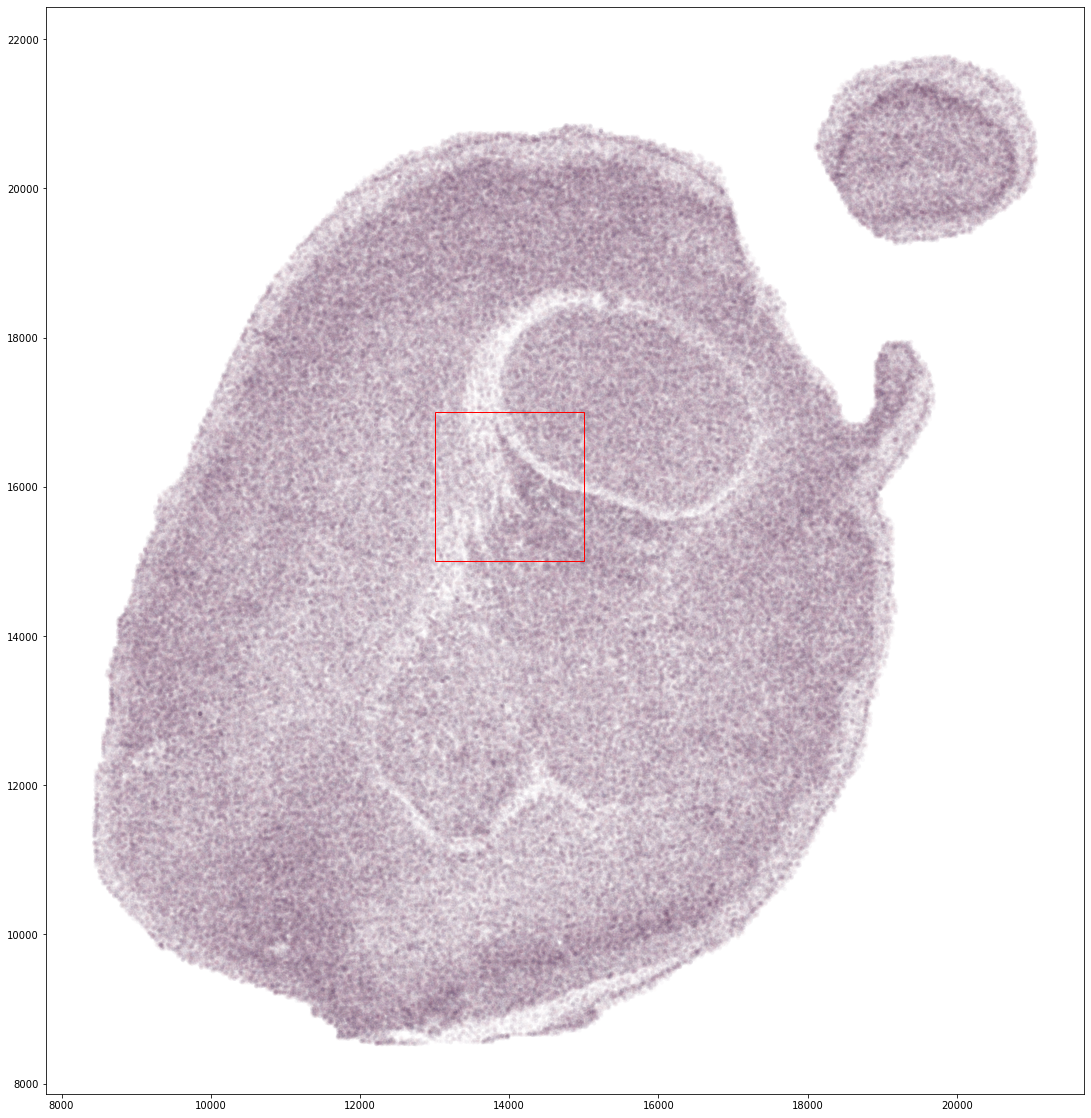

In [12]:
fig, ax = plt.subplots(figsize=(20, 20))
table[::100].scatter_plot(ax=ax, alpha=0.03)
sub.plot_rect(ax, 'r')

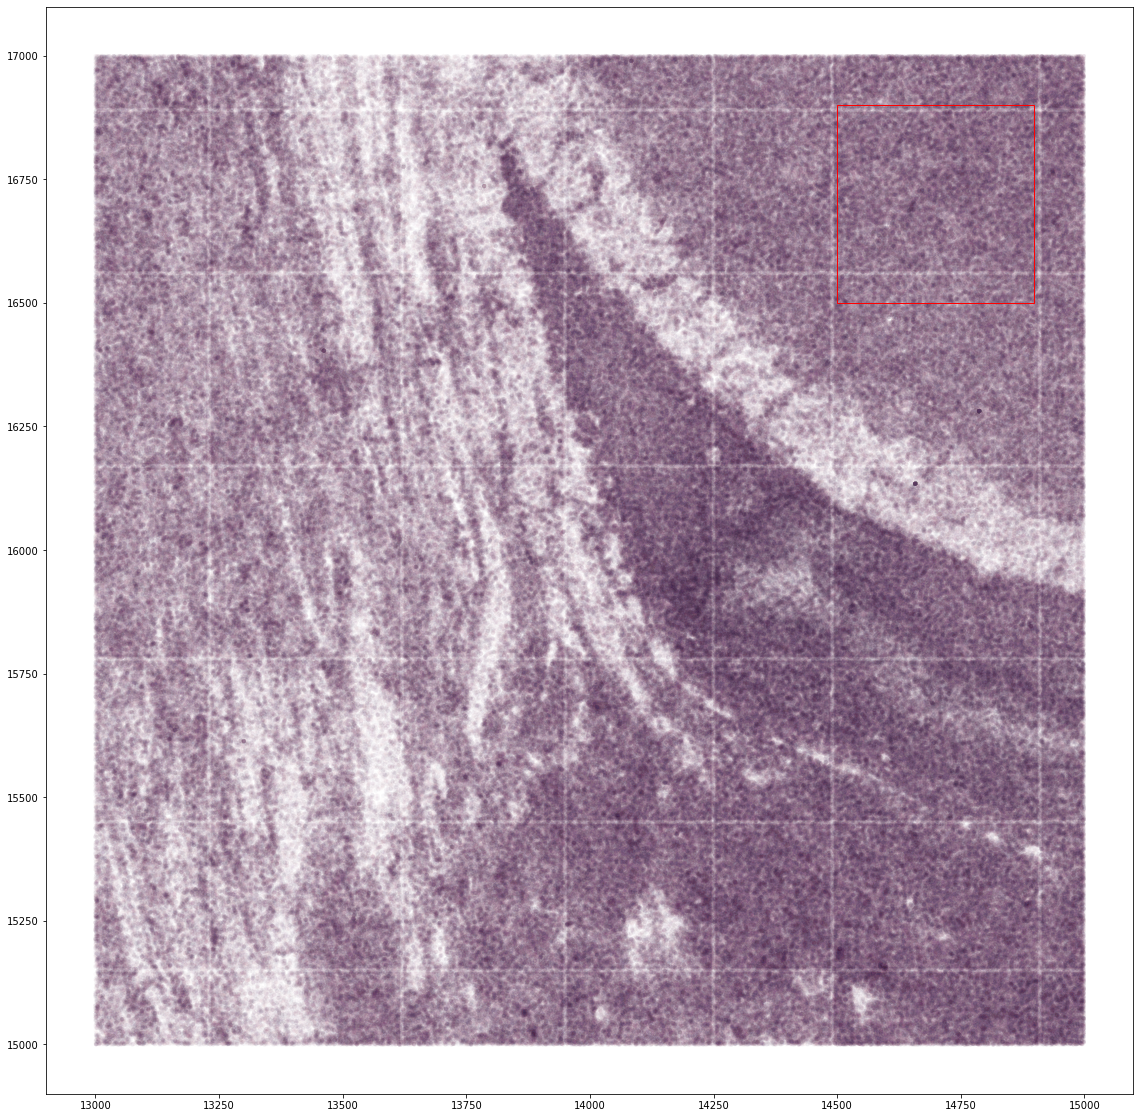

In [13]:
fig, ax = plt.subplots(figsize=(20, 20))
sub.scatter_plot(ax=ax, alpha=0.03)
sub2 = sub.get_subregion(xlim=(14500, 14900), ylim=(16500, 16900))
sub2.plot_rect(ax, 'r')

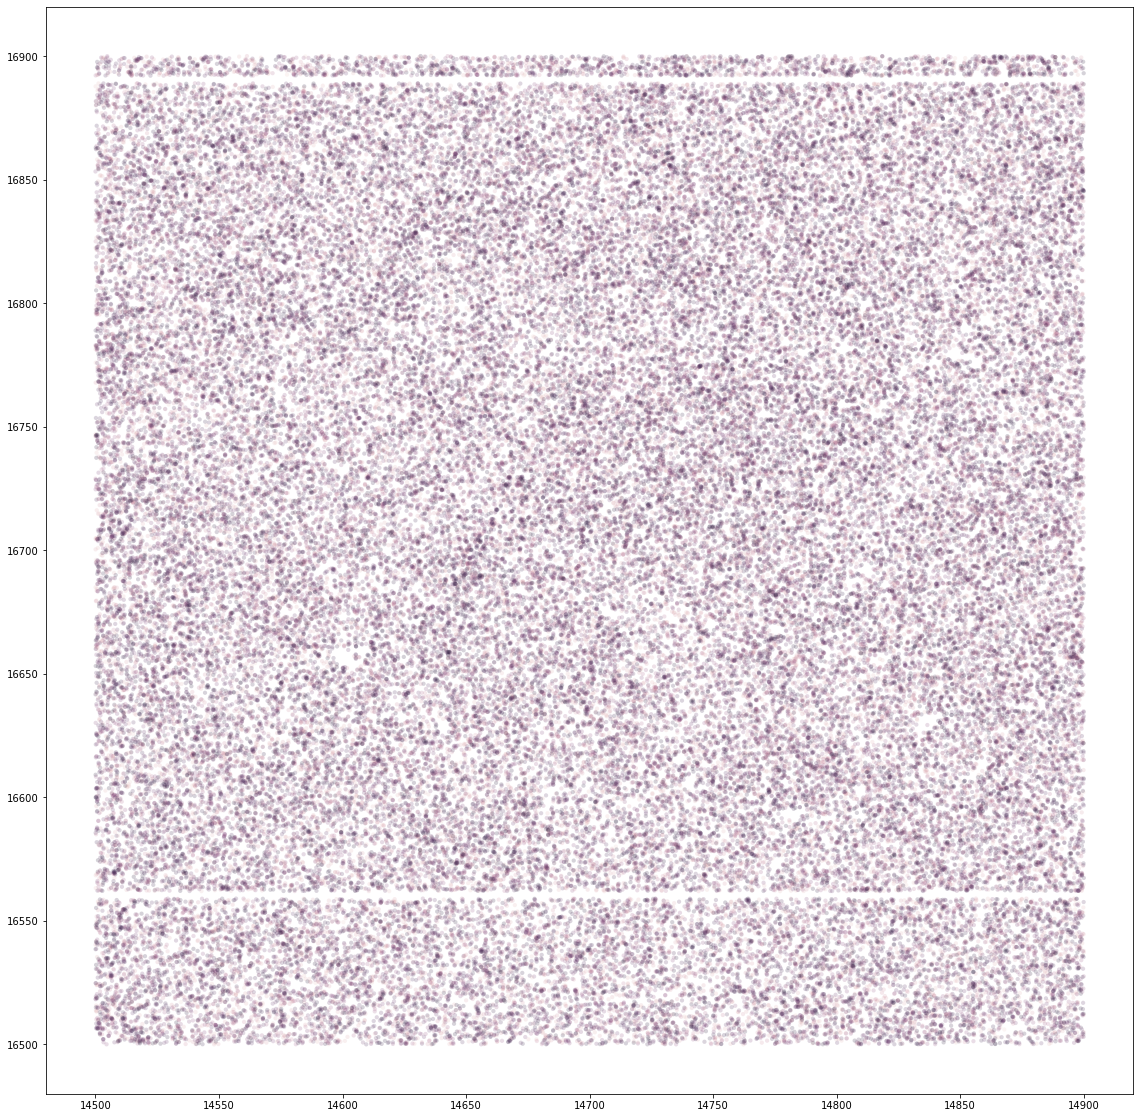

In [9]:


fig, ax = plt.subplots(figsize=(20, 20))
sub2.scatter_plot(ax=ax, alpha=0.2, color='gene')

Binning expression counts..


  0%|          | 0/40 [00:00<?, ?it/s]

Reducing binned expression counts..


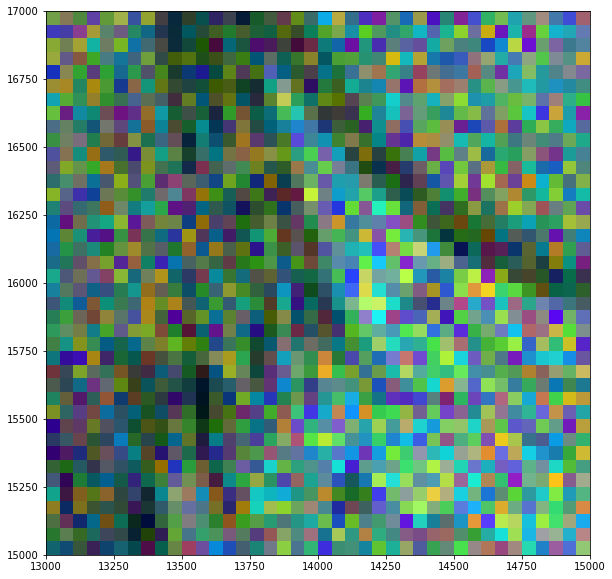

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
sub.reduced_expression_map(binsize=50, ax=ax, umap_args=dict(
    min_dist=0.4,
    n_neighbors=10,
    random_state=0,
));

Binning expression counts..


  0%|          | 0/64 [00:00<?, ?it/s]

Reducing binned expression counts..


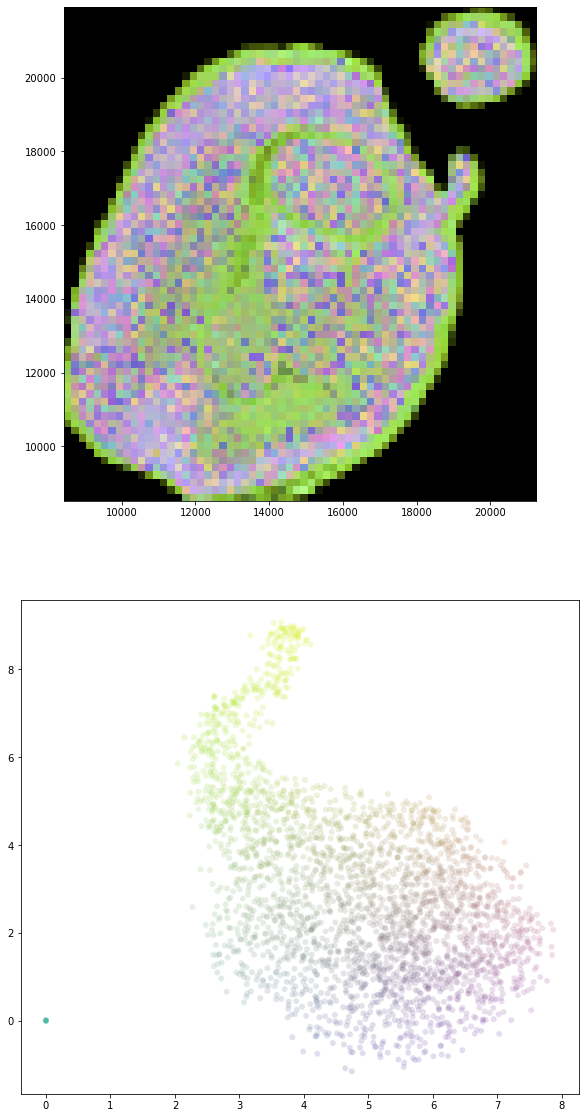

In [18]:
fig, ax = plt.subplots(2, 1, figsize=(10, 20))
table.reduced_expression_map(binsize=200, ax=ax[0], umap_ax=ax[1], umap_args=dict(
    min_dist=0.4,
    n_neighbors=10,
    random_state=0,
));

Binning expression counts..


  0%|          | 0/40 [00:00<?, ?it/s]

Reducing binned expression counts..


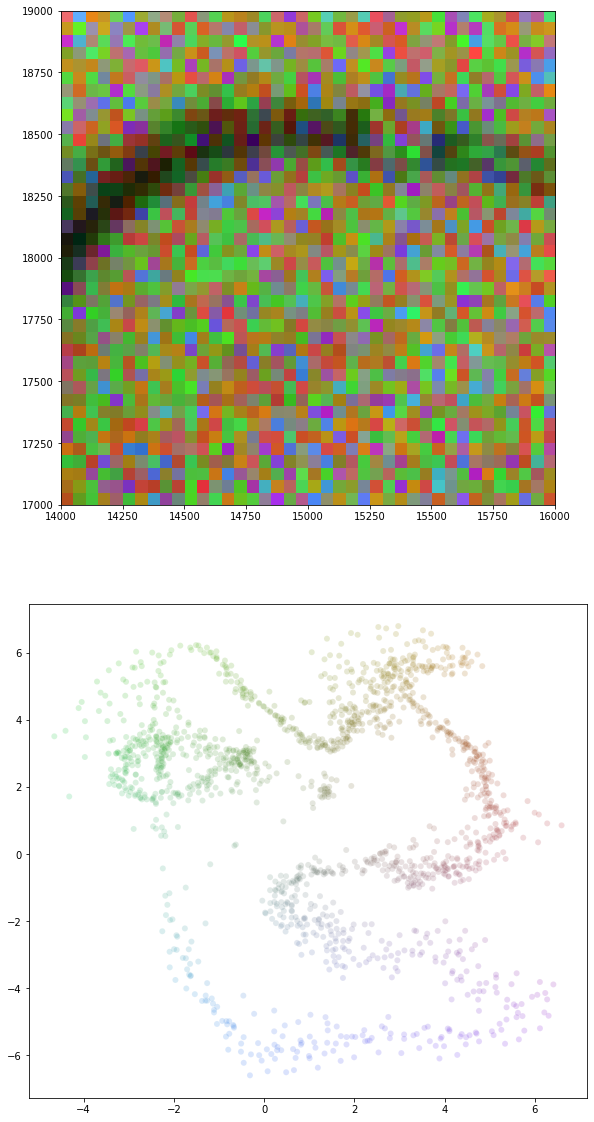

In [99]:
fig, ax = plt.subplots(2, 1, figsize=(10, 20))
sub = table.get_subregion(xlim=(14000, 16000), ylim=(17000, 19000))
sub.reduced_expression_map(binsize=50, ax=ax[0], umap_ax=ax[1], umap_args=dict(
    min_dist=0.1,
    n_neighbors=3,
    random_state=0,
));

Binning expression counts..


  0%|          | 0/64 [00:00<?, ?it/s]

Reducing binned expression counts..


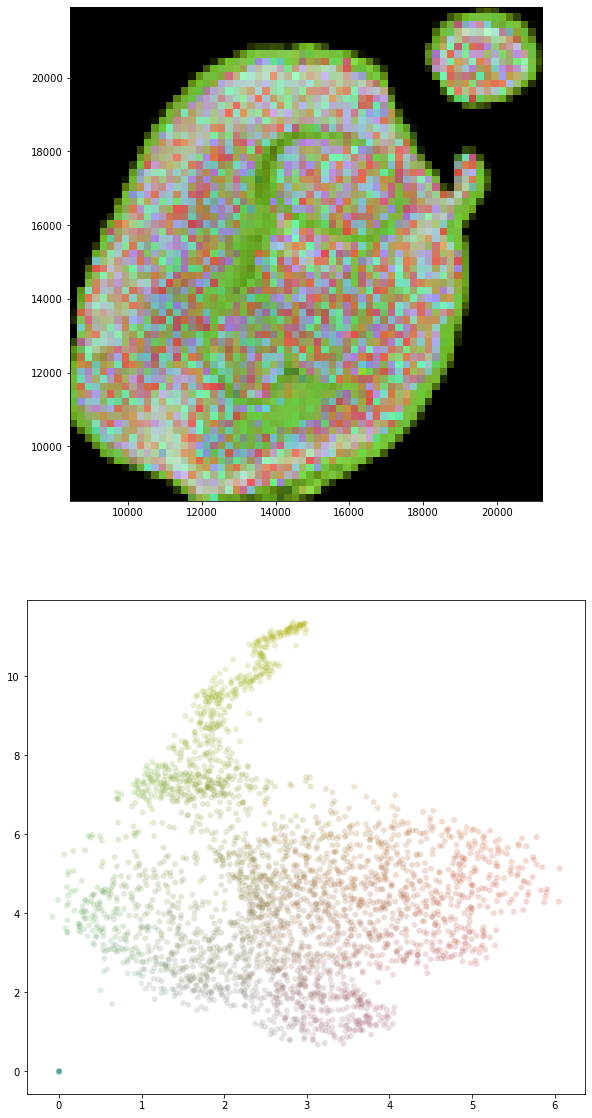

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(10, 20))
table.reduced_expression_map(binsize=200, ax=ax[0], umap_ax=ax[1], umap_args=dict(
    min_dist=0.2,
    n_neighbors=5,
    random_state=0,
));

### Note: squiggles in UMAP are an indication that there is very little overlap in gene expression between bins

Binning expression counts..


  0%|          | 0/100 [00:00<?, ?it/s]

Reducing binned expression counts..


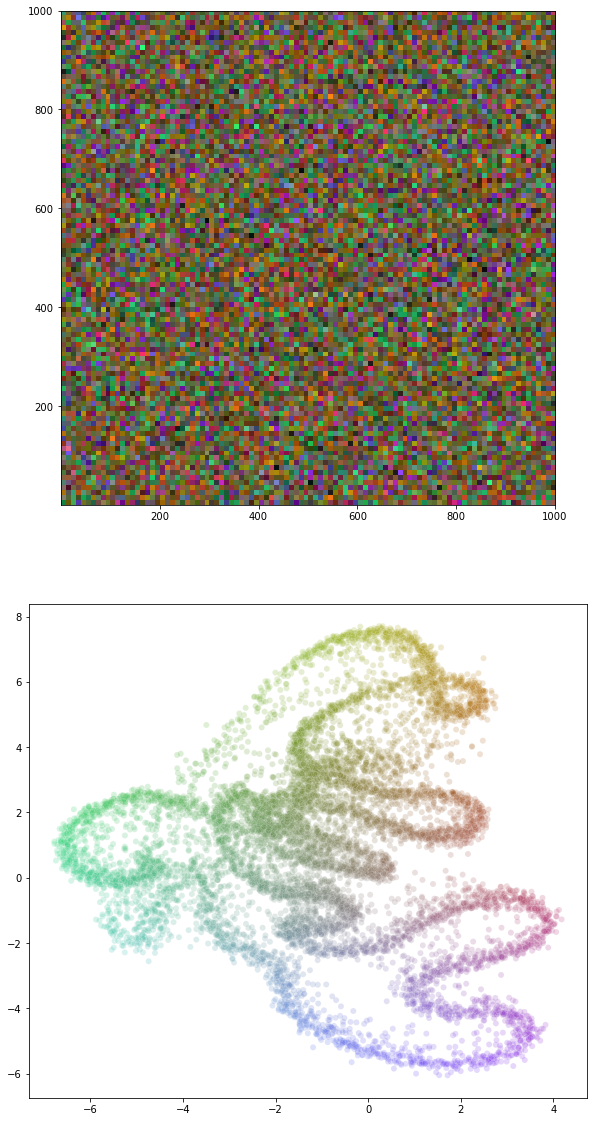

In [106]:
N = 100000
data = np.empty(N, dtype=[('x', float), ('y', float), ('gene', int)])
data['x'] = np.random.uniform(0, 1000, size=N)
data['y'] = np.random.uniform(0, 1000, size=N)
data['gene'] = np.random.randint(0, 10000, size=N)
test_table = SpotTable(data)

fig, ax = plt.subplots(2, 1, figsize=(10, 20))
test_table.reduced_expression_map(binsize=10, ax=ax[0], umap_ax=ax[1], umap_args=dict(
    min_dist=0.4,
    n_neighbors=10,
    random_state=0,
));